In [53]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data_dir = 'data'
img_ext = ['jpg', 'png', 'bmp', 'jpeg']

In [55]:
if imghdr.what('data/harimau/0983cfec-60ec-4818-85c2-1c3f62319537_169.jpeg') not in img_ext:
    print("salah")
else:
    print("benar")

benar


In [56]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            type_ext = imghdr.what(image_path)
            if type_ext not in img_ext:
                print(f"Image not in extension list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"issue with image {image_path}")
            

## 3. Load data

In [57]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 822 files belonging to 2 classes.


In [58]:
data_iterator = data.as_numpy_iterator()

In [59]:
batch = data_iterator.next()

In [60]:
len(batch[1])

32

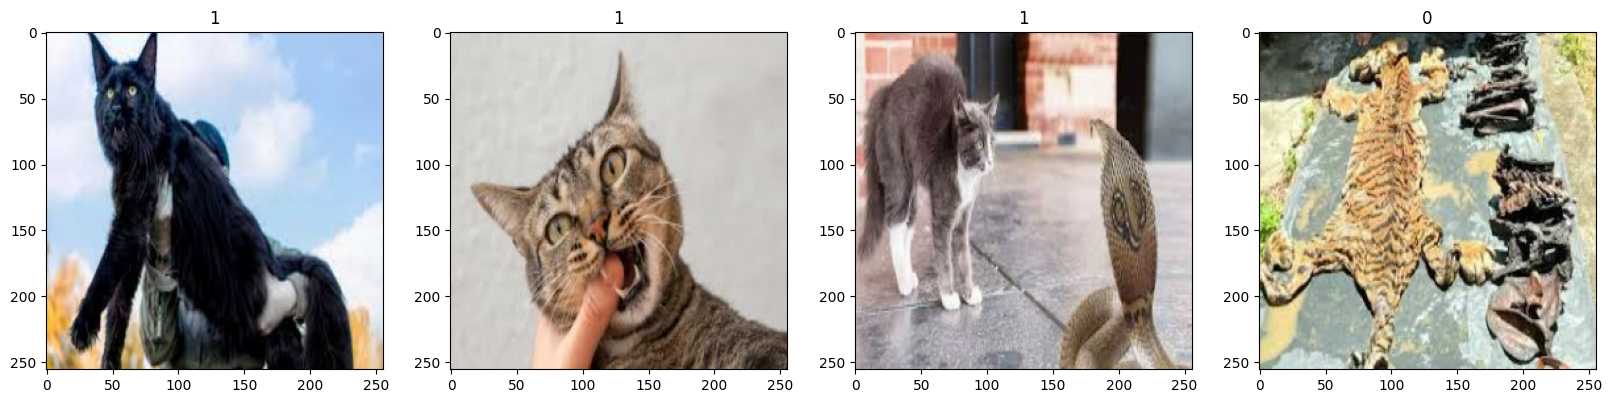

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [62]:
data = data.map(lambda x, y: (x/255, y))

In [63]:
data.as_numpy_iterator().next()

(array([[[[1.        , 0.99607843, 0.9563113 ],
          [1.        , 0.9978095 , 0.9603401 ],
          [0.99846184, 0.999553  , 0.96712625],
          ...,
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ],
          [0.9882353 , 0.9882353 , 0.9882353 ]],
 
         [[1.        , 0.9927696 , 0.9440564 ],
          [0.99915016, 0.99160504, 0.9480852 ],
          [0.99611676, 0.99198836, 0.9554982 ],
          ...,
          [0.9890625 , 0.9890625 , 0.9890625 ],
          [0.9890625 , 0.9890625 , 0.9890625 ],
          [0.9890625 , 0.9890625 , 0.9890625 ]],
 
         [[0.995864  , 0.9748775 , 0.91721815],
          [0.99325156, 0.9783082 , 0.92266333],
          [0.9890717 , 0.9833035 , 0.9342846 ],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         ...,
 
         [[0.9820772 , 0.9862132 , 0.9129596 ],
          [0.97924

In [64]:
(len(data))

26

## 5. Split Data

In [65]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [66]:
train_size, val_size, test_size

(18, 5, 2)

In [67]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6.Build deep learning model

In [68]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), 1, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

## 7. Train

In [71]:
logdir='logs'

In [72]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=tensorboard_callback)

Epoch 1/20


18/18 [==============================] - 20s 993ms/step - loss: 0.6594 - accuracy: 0.5920 - val_loss: 0.5937 - val_accuracy: 0.5250
Epoch 2/20
18/18 [==============================] - 16s 850ms/step - loss: 0.5090 - accuracy: 0.6684 - val_loss: 0.4359 - val_accuracy: 0.8000
Epoch 3/20
18/18 [==============================] - 16s 867ms/step - loss: 0.4509 - accuracy: 0.7760 - val_loss: 0.3508 - val_accuracy: 0.7812
Epoch 4/20
18/18 [==============================] - 17s 889ms/step - loss: 0.2915 - accuracy: 0.8872 - val_loss: 0.3356 - val_accuracy: 0.8750
Epoch 5/20
18/18 [==============================] - 18s 947ms/step - loss: 0.1996 - accuracy: 0.9219 - val_loss: 0.2582 - val_accuracy: 0.9125
Epoch 6/20
18/18 [==============================] - 18s 959ms/step - loss: 0.2011 - accuracy: 0.9201 - val_loss: 0.2829 - val_accuracy: 0.8625
Epoch 7/20
18/18 [==============================] - 16s 848ms/step - loss: 0.1270 - accuracy: 0.9549 - val_loss: 0.1132 - val_accuracy: 0.9688
Epoch 8/20

## 8. Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

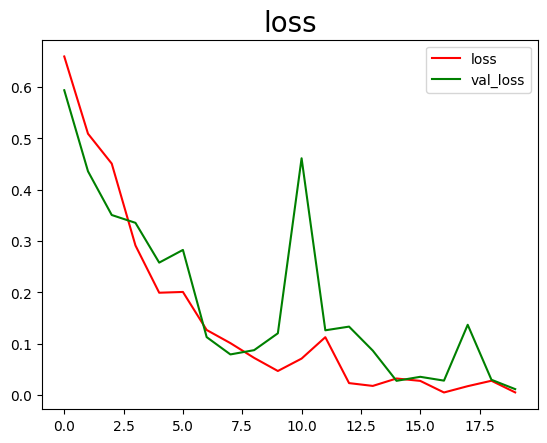

In [74]:
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
plt.title('loss', fontdict={'fontsize': 20})
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

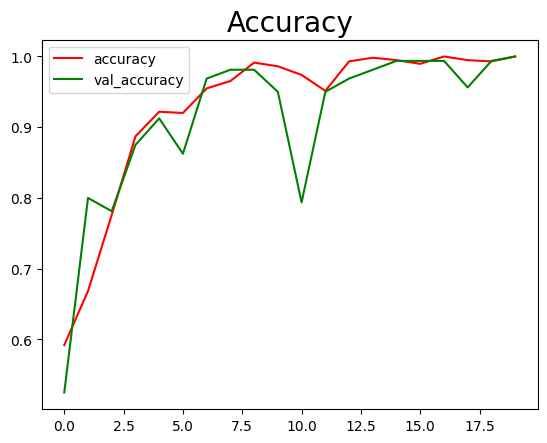

In [75]:
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.title('Accuracy', fontdict={'fontsize': 20})
plt.legend()
plt.show

In [76]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [77]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 151ms/step


In [78]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## 10. Test

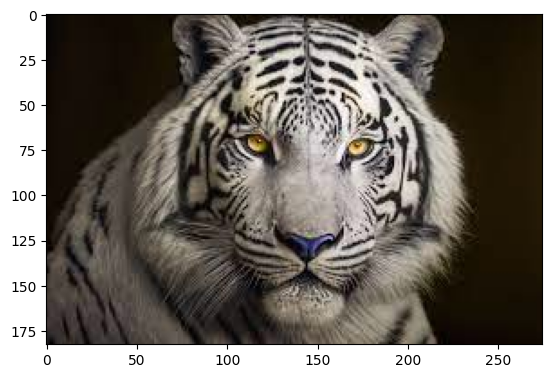

In [79]:
img = cv2.imread('tigerTes3.jpg')
plt.imshow(img)
plt.show()

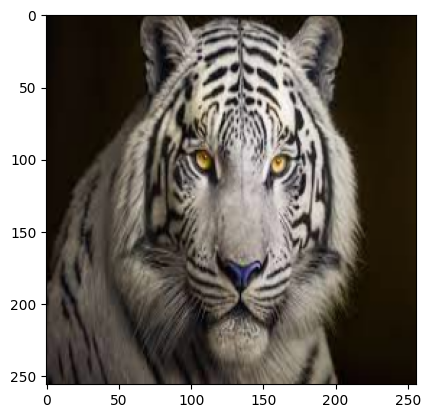

In [80]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [81]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.072266  ,  5.        ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       [[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.072266  ,  5.        ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       [[ 8.        ,  6.        ,  5.        ],
        [ 8.111328  ,  6.111328  ,  5.111328  ],
        [ 9.185547  ,  7.185547  ,  6.185547  ],
        ...,
        [26.44336   , 19.125538  ,  4.8934555 ],
        [27.        , 20.        ,  3.2226562 ],
        [27.        , 20.        ,  3.        ]],

       ...,

     

In [82]:
pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 113ms/step


In [83]:
pred

array([[0.00071996]], dtype=float32)

In [84]:
if pred > 0.5:
    print("That's cat")
else:
    print("That's Tiger")

That's Tiger


In [85]:
def prediction(fileImage, model):
    img = cv2.imread(fileImage)
    resize = tf.image.resize(img, (256,256))
    pred = model.predict(np.expand_dims(resize/255, 0))
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    if pred > 0.5:
        print("That's a cat")
    else: 
        print("That's a tiger")

1/1 [==============================] - 0s 37ms/step


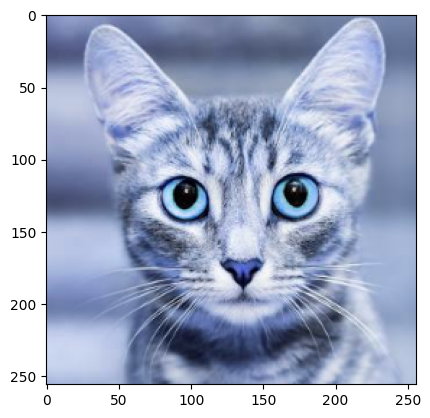

That's a cat


In [86]:
prediction('kucingTest.jpg', model)

1/1 [==============================] - 0s 33ms/step


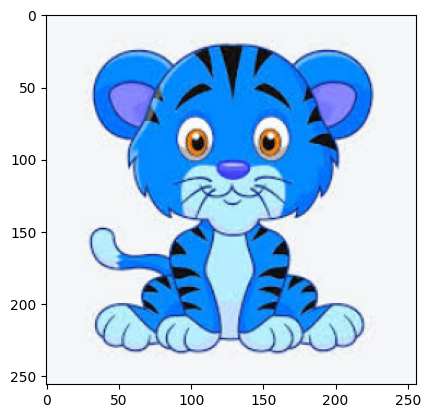

That's a cat


In [87]:
prediction('tigerTes.jpg', model)

1/1 [==============================] - 0s 33ms/step


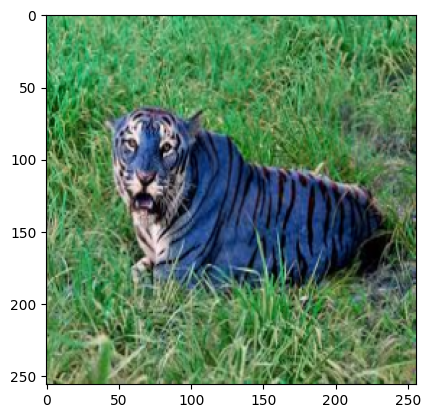

That's a tiger


In [88]:
prediction('tigerTes2.jpg', model)

1/1 [==============================] - 0s 31ms/step


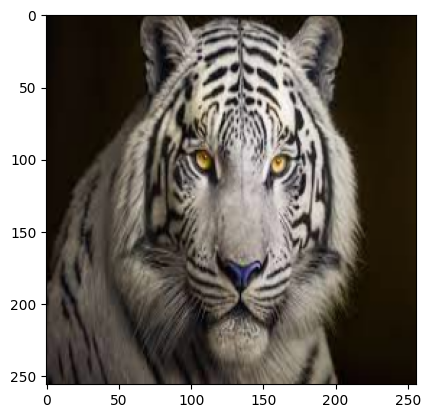

That's a tiger


In [89]:
prediction('tigerTes3.jpg', model)

1/1 [==============================] - 0s 33ms/step


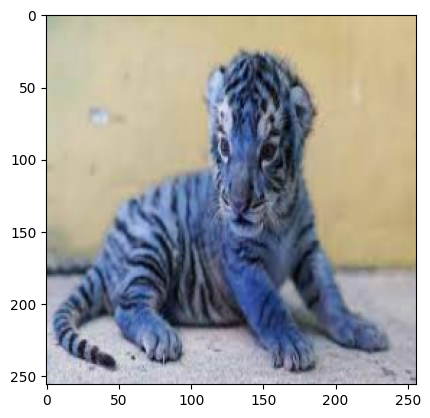

That's a cat


In [90]:
prediction('tigerTes4.jpg', model)

## 11. Save the model

In [91]:
model.save(os.path.join('model', 'imageClassifier.h5'))

c:\Users\zulfa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
loadModel = tf.keras.models.load_model('model/imageClassifier.h5')

1/1 [==============================] - 0s 124ms/step


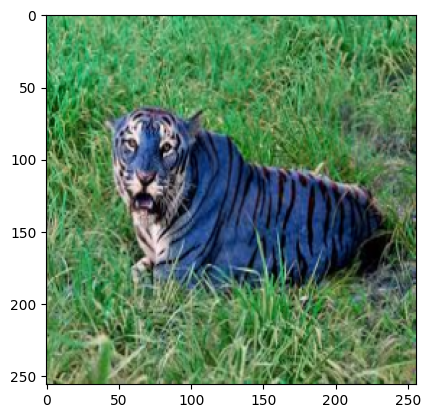

That's a tiger


In [93]:
prediction('tigerTes2.jpg', loadModel)